In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-linear-converge)

In [2]:
lambda = 10;
exact = @(x) sinh(lambda * x) / sinh(lambda) - 1;

The following functions define the ODE.

In [3]:
p = @(x) zeros(size(x));            
q = @(x) -lambda^2 * ones(size(x));
r = @(x) lambda^2 * ones(size(x));

We compare the computed solution to the exact one for increasing $n$.

In [4]:
p = @(x) zeros(size(x));            
q = @(x) -lambda^2 * ones(size(x));
r = @(x) lambda^2 * ones(size(x));
n = 2 * round(10.^(1:0.25:3)');
err = zeros(size(n));
for k = 1:length(n)
    [x, u] = bvplin(p, q, r, 0, 1, -1, 0, n(k));
    err(k) = norm(exact(x) - u, Inf);
end
disp(table(n, err, variableNames = ["n", "inf-norm error"]))

     n      inf-norm error
    ____    ______________

      20       0.0037471  
      36       0.0011679  
      64      0.00037262  
     112      0.00012209  
     200      3.8312e-05  
     356      1.2093e-05  
     632      3.8375e-06  
    1124      1.2133e-06  
    2000      3.8321e-07  



Each factor of 10 in $n$ reduces error by a factor of 100, which is indicative of second-order convergence.

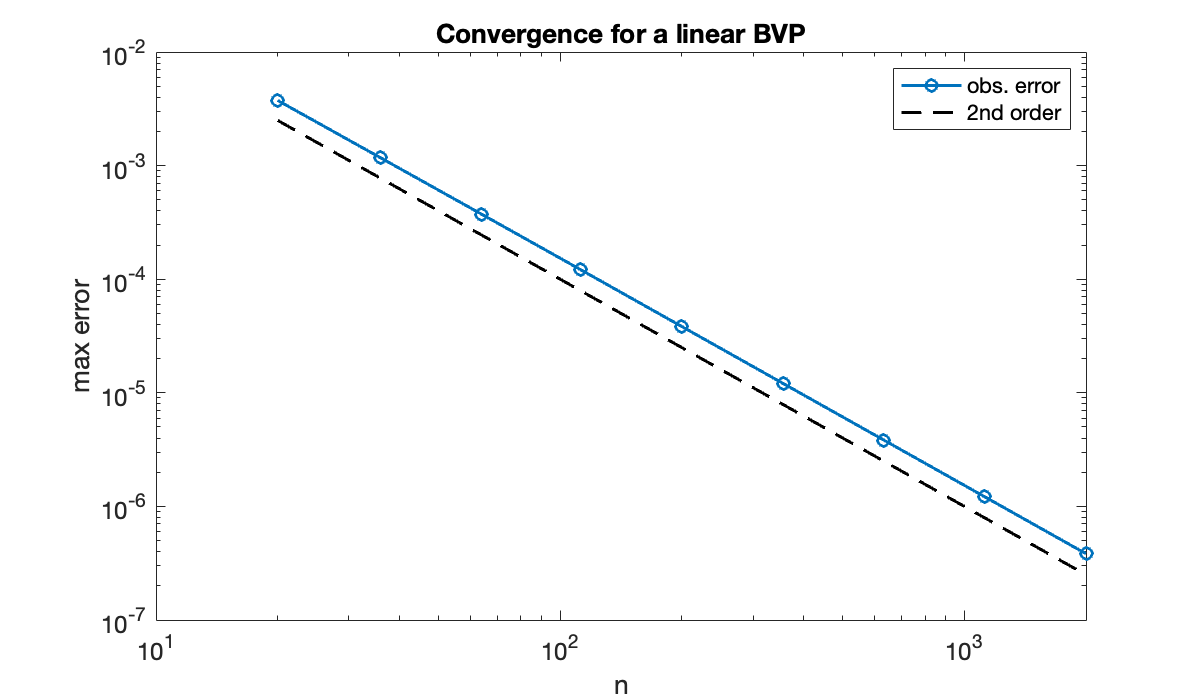

In [5]:
clf,  loglog(n, err, 'o-')
hold on, loglog(n, n.^(-2), 'k--')
xlabel('n'),  ylabel('max error')
title('Convergence for a linear BVP') 
legend('obs. error', '2nd order')